In [42]:
import numpy as np
import rdkit 
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import matplotlib.pyplot as plt

from tdc.multi_pred import DTI

In [11]:
data = DTI(name='BindingDB_IC50') 
data.harmonize_affinities(mode='max_affinity')
data.convert_to_log(form='binding')

Downloading...
100%|██████████| 839M/839M [01:04<00:00, 13.0MiB/s]
Loading...
Done!
The scale is in original affinity scale, so we will take the minimum!
The original data has been updated!
To log space...


In [12]:
split = data.get_split()

In [22]:
proteins = {'P35968': {'ChEMBL_ID': 'CHEMBL279',
            'Nickname': 'VEGFR-2',
            'Fullname': 'Vascular endothelial growth factor receptor 2'},
            
            'P07711': {'ChEMBL_ID': 'CHEMBL3837',
            'Nickname': 'CTSL',
            'Fullname': 'Cathepsin L'},
            
            'P08172': {'ChEMBL_ID': 'CHEMBL211',
            'Nickname': 'CHRM2',
            'Fullname': 'Muscarinic acetylcholine receptor M2'}
 }

In [61]:
df_train = split['train']
df_train['Set'] = 'train'
df_valid = split['valid']
df_valid['Set'] = 'valid'
df_test = split['test']
df_test['Set'] = 'test'

df = pd.concat([df_train, df_valid, df_test])

In [62]:
df_VEGFR2 = df[df['Target_ID'] == 'P35968'].reset_index(drop=True)
df_CTSL = df[df['Target_ID'] == 'P07711'].reset_index(drop=True)
df_CHRM2 = df[df['Target_ID'] == 'P08172'].reset_index(drop=True)

In [85]:
df_VEGFR2[df_VEGFR2['Set'] == 'train'].shape, df_VEGFR2[df_VEGFR2['Set'] == 'valid'].shape, df_VEGFR2[df_VEGFR2['Set'] == 'test'].shape

((5113, 6), (738, 6), (1483, 6))

In [63]:
df_VEGFR2_psl = pd.DataFrame()
df_CTSL_psl = pd.DataFrame()
df_CHRM2_psl = pd.DataFrame()

In [71]:
df_VEGFR2_psl['smiles'] = [Chem.CanonSmiles(x) for x in df_VEGFR2['Drug']]
df_VEGFR2_psl['y'] = df_VEGFR2['Y']

df_CTSL_psl['smiles'] = [Chem.CanonSmiles(x) for x in df_CTSL['Drug']]
df_CTSL_psl['y'] = df_CTSL['Y']

df_CHRM2_psl['smiles'] = [Chem.CanonSmiles(x) for x in df_CHRM2['Drug']]
df_CHRM2_psl['y'] = df_CHRM2['Y']

In [73]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(df_CHRM2_psl['smiles'], df_CHRM2_psl['y'], test_size=0.3, random_state=42)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_train.to_csv('/root/cloud-data/snf-mgln-idd-workspace/I0549447/code/projects/ChallengePSL/data/CHRM2/X_train.csv', index=False)
y_train.to_csv('/root/cloud-data/snf-mgln-idd-workspace/I0549447/code/projects/ChallengePSL/data/CHRM2/y_train.csv', index=False)
X_test.to_csv('/root/cloud-data/snf-mgln-idd-workspace/I0549447/code/projects/ChallengePSL/data/CHRM2/X_test.csv', index=False)
y_test.to_csv('/root/cloud-data/snf-mgln-idd-workspace/I0549447/code/projects/ChallengePSL/data/CHRM2/y_test.csv', index=False)



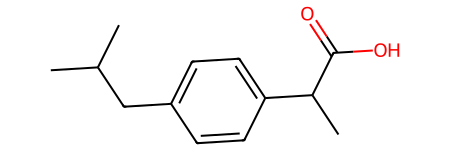

In [145]:
Chem.MolFromSmiles("CC(C)CC1=CC=C(C=C1)C(C)C(=O)O")

# Overview

Une des principales familles de médicaments est celle dite des "petites molécules", dont le poids moléculaire est compris entre 0.1 et 1 kDa. Le plus souvent ces petites molécules vont cibler une protéine ayant un rôle dans les causes ou les symptômes d'une maladie. Pour avoir un ordre de grandeur, il existe aujourd'hui sur le marché un peu plus de 2500 médicaments de la famille des petites molécules, ciblant environ 750 protéines du corps humains. Généralement les médicaments ont une fonction inhibitrice, cherchant à réduire l'expression d'une protéine. 

L'efficacité d'un médicament à petites molécules est le plus souvent mesurée sa concentration inhibitrice médiane (IC50). L'IC50 est une mesure quantitative qui indique quelle concentration est nécessaire pour inhiber de moitié un processus biologique in vitro. Expérimentalement, cette valeur est déterminée en réalisant une courbe de dose-réponse. Il est courant d'utiliser la pIC50 plutôt que l'IC50 comme métrique d'inhibition. Il s'agit simplement du logarithme négatif de l'IC50 lorsqu'elle est convertie en molaire.
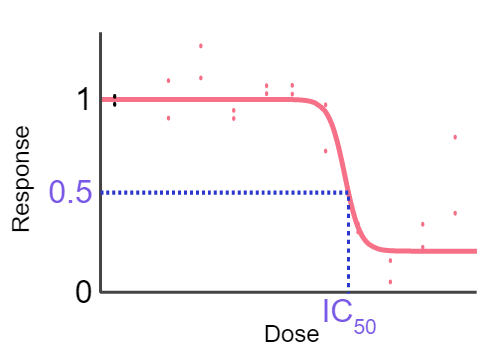


Étant donné une nouvelle protéine cible, la toute première étape consiste à cribler un ensemble de composés potentiels pour déterminer leur activité. Les méthodes traditionnelles pour évaluer les affinités sont les expériences de criblage à haut débit en laboratoire. Cependant, elles sont très coûteuses et sont donc limitées par leur capacité à rechercher un grand nombre de candidats. Ainsi, la prediction de l'affinité d'une mo


La tâche de prédiction de l'interaction entre le médicament et la cible vise à prédire le score d'activité de l'interaction in silico en ne tenant compte que des informations structurelles accessibles du composé et de la séquence d'acides aminés de la protéine.

# Data

# Rules

# Code